# Diabetes, Hypertension, Hyperlidemia comorbidity

In [2]:
import numpy as a
import pandas as pd
import geopandas as gpd
%matplotlib inline

In [3]:
# import dataset
dataset = pd.read_csv("dhh_all_2016.csv")
census = pd.read_csv("census.csv")

#add a column for percentage|
dataset['% Ensured'] = dataset['BTLPAN'] / dataset['BTLPAD'] * 100


# filter to important info
num_ppl = dataset.groupby("CT").sum()['% Ensured']
num_ppl.sort_values(ascending=False)

CT
980000    25.000000
483800    11.177474
428100    10.596026
482500    10.236220
512000    10.143198
            ...    
70500      1.847826
140200     1.406800
70800      1.337296
980100     0.000000
980700     0.000000
Name: % Ensured, Length: 390, dtype: float64

  
**This is a simple, sorted dataset, where the left column represents a census tract, and the right column the percent of people in that census tract that have been diagnosed, ensured, and medicated for having diabetes, hypertension, and hyperlidemia diseases. This encompasses all of Allegheny County, so we can create a dataset that represents only neighborhoods in Pittsburgh, as well as assign them to a name, using Pittsburgh Census Tract data from the same year**

In [4]:
# import dataset
dataset = pd.read_csv("dhh_all_2016.csv")
census = pd.read_csv("census.csv")

#add a column for percentage|
dataset['% Ensured'] = dataset['BTLPAN'] / dataset['BTLPAD'] * 100

pittCTs = census['tractce10'].tolist()

for index, row in dataset.iterrows():
    if int(row['CT']) not in pittCTs:
        dataset = dataset.drop(index)
    


# filter to important info
num_ppl = dataset.groupby("CT").sum()['% Ensured']
num_ppl.sort_values(ascending=False)

CT
980000    25.000000
30500      9.545984
241200     9.164420
262000     8.939709
240600     8.934338
            ...    
70500      1.847826
140200     1.406800
70800      1.337296
980100     0.000000
980700     0.000000
Name: % Ensured, Length: 126, dtype: float64

**This dataset encompasses the percentage for only Pittsburgh neighborhoods, but we can do better by adding a label to each one using the census data**

In [5]:
dataset

,CT,BTLPAD,BTLPAN,BTLWAD,BTLWAN,BTLMAD,BTLMAN,% Ensured
0,10300,422,12,197,5,225,7,2.843602
1,20100,2610,49,1242,17,1368,32,1.877395
2,20300,354,11,175,3,179,8,3.107345
3,30500,859,82,553,59,306,23,9.545984
4,40200,388,25,233,16,155,9,6.443299
...,...,...,...,...,...,...,...,...
377,563100,1867,106,992,58,875,48,5.677558
378,563200,700,36,359,18,341,18,5.142857
387,980000,4,1,3,1,1,0,25.000000
388,980100,7,0,6,0,1,0,0.000000


In [6]:
dataset.insert(0, 'Neighborhood', pd.NaT)

for index, row in dataset.iterrows():
    for Cindex, Crow in census.iterrows():
        if int(row['CT']) == int(Crow['tractce10']):
            name = Crow['hood']
            dataset.at[index, 'Neighborhood'] = name
            
dataset = dataset.drop_duplicates(subset='Neighborhood', keep='first')
            
dataset
    

,Neighborhood,CT,BTLPAD,BTLPAN,BTLWAD,BTLWAN,BTLMAD,BTLMAN,% Ensured
0,Bluff,10300,422,12,197,5,225,7,2.843602
1,Central Business District,20100,2610,49,1242,17,1368,32,1.877395
2,Strip District,20300,354,11,175,3,179,8,3.107345
3,Crawford-Roberts,30500,859,82,553,59,306,23,9.545984
4,West Oakland,40200,388,25,233,16,155,9,6.443299
...,...,...,...,...,...,...,...,...,...
374,Oakwood,562800,622,47,332,27,290,20,7.556270
376,Windgap,563000,1159,89,669,46,490,43,7.679034
377,Westwood,563100,1867,106,992,58,875,48,5.677558
378,East Allegheny,563200,700,36,359,18,341,18,5.142857


,Neighborhood,CT,BTLPAD,BTLPAN,BTLWAD,BTLWAN,BTLMAD,BTLMAN,% Ensured
3,Crawford-Roberts,30500,859,82,553,59,306,23,9.545984
81,Spring Garden,241200,371,34,192,16,179,18,9.164420
91,Spring Hill-City View,262000,962,86,540,45,422,41,8.939709
80,Troy Hill,240600,929,83,471,37,458,46,8.934338
45,Homewood South,130300,483,40,296,23,187,17,8.281573
103,Lincoln Place,310200,1842,147,961,64,881,83,7.980456
376,Windgap,563000,1159,89,669,46,490,43,7.679034
369,Hazelwood,562300,1335,102,775,61,560,41,7.640449
374,Oakwood,562800,622,47,332,27,290,20,7.556270
28,Stanton Heights,100500,1067,80,611,38,456,42,7.497657


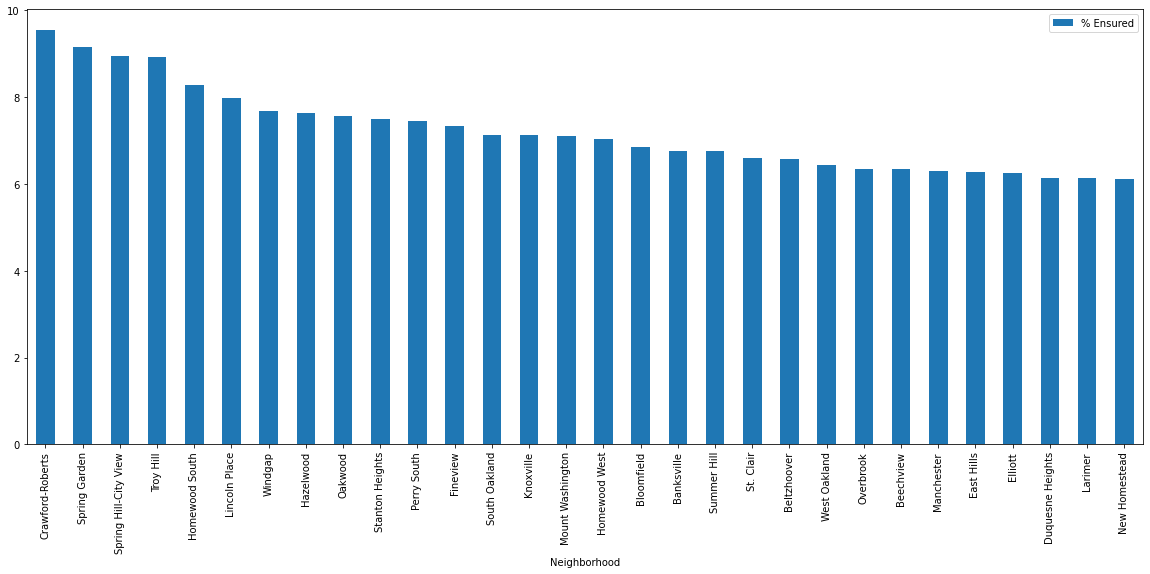

In [7]:
dataset = dataset.sort_values('% Ensured', ascending=False)

dataset.head(30).plot.bar(x='Neighborhood', y='% Ensured', figsize=(20,8))
dataset.head(30)


**Top 30 Insured neighborhoods in Pittsburgh, by percentage**

Index(['objectid', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'area', 'perimeter', 'neighbor_', 'neighbor_i', 'hood',
       'hood_no', 'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors',
       'shape_le_1', 'shape_ar_1', 'page_numbe', 'plannerass', 'created_us',
       'created_da', 'last_edite', 'last_edi_1', 'temp', 'Shape__Are',
       'Shape__Len', 'geometry'],
      dtype='object')


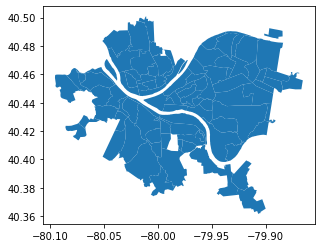

In [10]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")

neighborhoods.plot()

print(neighborhoods.columns)



In [11]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")


datamap = neighborhoods.merge(dataset, how='left', left_on='hood', right_on='Neighborhood')

datamap[['hood','% Ensured', 'geometry']].head()


,hood,% Ensured,geometry
0,Chateau,NaN,"POLYGON ((-80.02999 40.45909, -80.02989 40.458..."
1,Summer Hill,6.749556,"POLYGON ((-80.01078 40.49975, -80.01073 40.499..."
2,Northview Heights,2.997859,"POLYGON ((-80.00327 40.48271, -80.00325 40.482..."
3,Spring Hill-City View,8.939709,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
4,Perry South,7.450980,"POLYGON ((-80.01422 40.47745, -80.01435 40.477..."


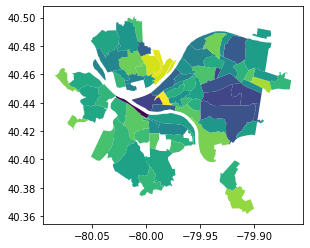

In [12]:
datamap.plot(column = '% Ensured')

In [ ]:
datamap.plot(column)